<IPython.core.display.Javascript object>


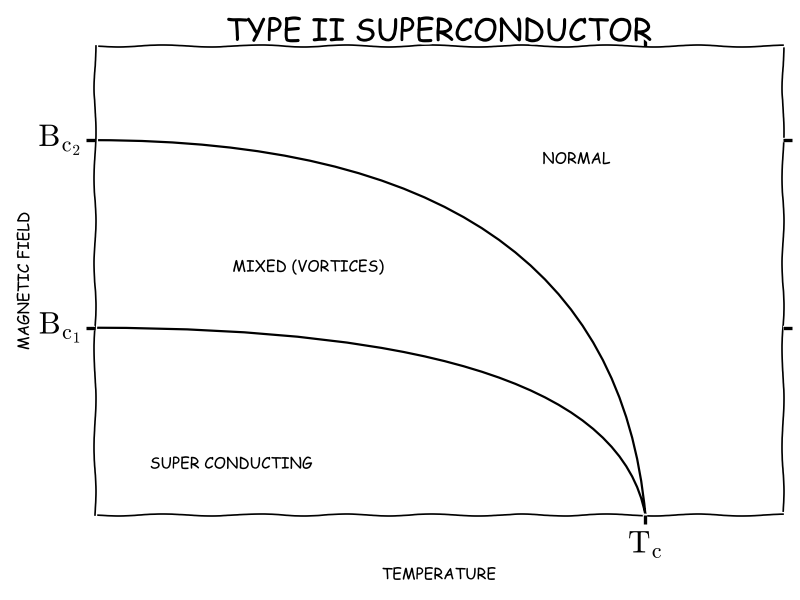

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
plt.rcParams["figure.figsize"]=[800./80,600./80]


def critical_patch(c1,c2,tc):

    vertices = np.array([
        (0., c2),
        (0.75, c2),
        (tc, 0.),
        (0.75, c1),
        (0., c1)
    ])


    codes = [Path.MOVETO,
             Path.CURVE3,
             Path.CURVE3,
             Path.CURVE3,
             Path.CURVE3,
             ]

    return patches.PathPatch(Path(vertices, codes),facecolor='none',lw=2)

crit_patch = critical_patch(0.4,0.8,0.8)


plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.add_patch(crit_patch)

ax.tick_params(axis='x',colors='black',direction='out')
ax.tick_params(axis='y',colors='black',direction='out')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xticks([0.8],('$\mathrm{T}_\mathrm{c}$',),fontsize=28)
plt.yticks([0.4,0.8],('$\mathrm{B}_{\mathrm{c}_1}$','$\mathrm{B}_{\mathrm{c}_2}$'),fontsize=28)
plt.title('TYPE II SUPERCONDUCTOR',fontsize=28)
plt.xlabel('TEMPERATURE')
plt.ylabel('MAGNETIC FIELD')

plt.text(0.08,0.1,'SUPER CONDUCTING')
plt.text(0.65,0.75,'NORMAL')
plt.text(0.2,0.52,'MIXED (VORTICES)')

plt.tight_layout()

plt.show()
fig.savefig('typeIIsuperconductor.svg')

<IPython.core.display.Javascript object>


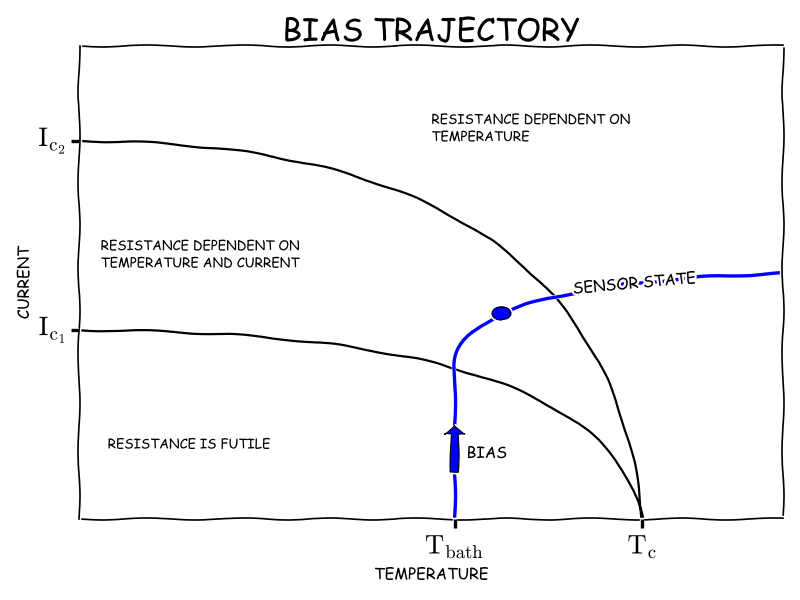

In [2]:
# bias slide

bias_verts = [
    (0.533,0),
    (0.533,0.322),
    (0.533,0.5),
    (1.0,0.52)
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3
]

bias_codes = [Path.MOVETO,
              Path.LINETO,
              Path.CURVE3,
              Path.CURVE3
             ]

plt.xkcd()

bias_path = Path(bias_verts, bias_codes)
fig = plt.figure()
ax = fig.add_subplot(111)
crit_patch = critical_patch(0.4,0.8,0.8)

ax.add_patch(crit_patch)
bias_patch=patches.PathPatch(bias_path,facecolor='none',edgecolor='blue',lw=3)
ax.add_patch(bias_patch)
ax.add_patch(patches.Arrow(.533,.1,0,.1,width=.05))

bias_xy=[0.6,0.435]
bias_point=patches.Ellipse(bias_xy,0.025,0.025)
ax.add_patch(bias_point)

ax.tick_params(axis='x',colors='black',direction='out')
ax.tick_params(axis='y',colors='black',direction='out')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.xticks([0.533,0.8],('$\mathrm{T}_\mathrm{bath}$','$\mathrm{T}_\mathrm{c}$'),fontsize=24)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([0.4,0.8],('$\mathrm{I}_{\mathrm{c}_1}$','$\mathrm{I}_{\mathrm{c}_2}$'),fontsize=24)
plt.title('BIAS TRAJECTORY',fontsize=28)
plt.xlabel('TEMPERATURE')
plt.ylabel('CURRENT')

plt.text(0.5,0.8,'RESISTANCE DEPENDENT ON\nTEMPERATURE',fontsize=12)
plt.text(0.03,0.533,'RESISTANCE DEPENDENT ON\nTEMPERATURE AND CURRENT',fontsize=12)
plt.text(0.04,0.15,'RESISTANCE IS FUTILE',fontsize=12)
plt.text(0.7,0.5,'SENSOR STATE',rotation=5.0)
plt.text(.55,.13,'BIAS')
plt.tight_layout()

fig.savefig('biastrajectory.svg')

plt.show()


<IPython.core.display.Javascript object>


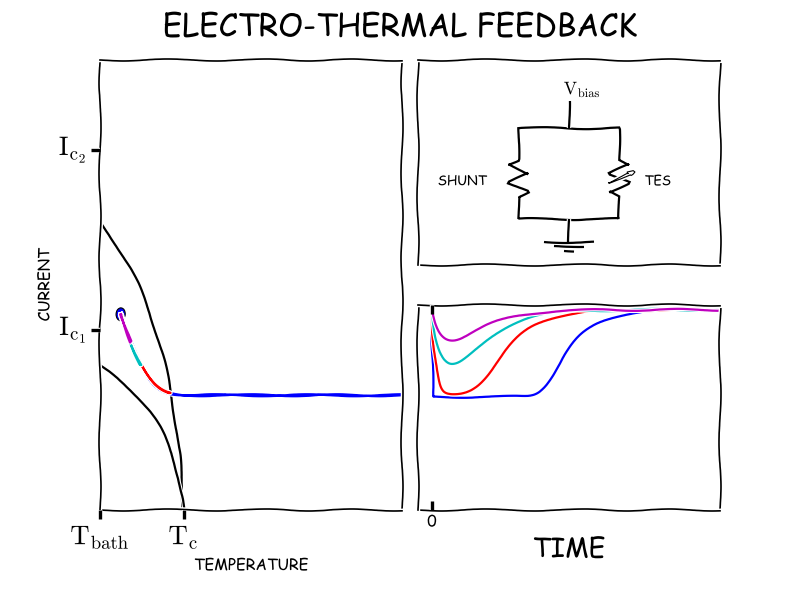

In [11]:
# cycle slide
import matplotlib.gridspec as gridspec
from scipy.special import erf as erf

verts1 = [
    (0., 0.8),  # P0
    (0.75, 0.8), # P1
    (0.8, 0.), # P3
    ]

verts2 = [
    (0., 0.4),  # P0
    (0.75, 0.4), # P1
    (0.8, 0.), # P3
    ]

bias_verts = [
    (0.533,0),
    (0.533,0.322),
    (0.533,0.5),
    (1.0,0.6)
]

codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3
]

bias_codes = [Path.MOVETO,
              Path.LINETO,
              Path.CURVE3,
              Path.CURVE3
             ]

plt.xkcd()
path1 = Path(verts1, codes)
path2 = Path(verts2, codes)
bias_path = Path(bias_verts, bias_codes)
fig = plt.figure()

gs = gridspec.GridSpec(2, 2)

ax=plt.subplot(gs[:,0])

patch1 = patches.PathPatch(path1, facecolor='none',edgecolor='black', lw=2)
ax.add_patch(patch1)
patch2 = patches.PathPatch(path2, facecolor='none',edgecolor='black', lw=2)
ax.add_patch(patch2)

bias_point=patches.Ellipse(bias_xy,0.025,0.025)
ax.add_patch(bias_point)

ax.tick_params(axis='x',colors='black',direction='out')
ax.tick_params(axis='y',colors='black',direction='out')

ax.set_xlim(0.7,1.5)
ax.set_ylim(0, 1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xticks([0.533,0.8],('$\mathrm{T}_\mathrm{bath}$','$\mathrm{T}_\mathrm{c}$'),fontsize=24)

plt.yticks([0.4,0.8],('$\mathrm{I}_{\mathrm{c}_1}$','$\mathrm{I}_{\mathrm{c}_2}$'),fontsize=24)
fig.suptitle('ELECTRO-THERMAL FEEDBACK',fontsize=28)
plt.xlabel('TEMPERATURE')
plt.ylabel('CURRENT')

def clip(x,k):
    s=1
    return erf(x)

t=np.arange(0,10000)

res_verts = [
    (0.3,0.3),
    (0.3,0.4),
    (0.32,0.42),
    (0.3,0.44),
    (0.28,0.46),
    (0.3,0.48),
    (0.32,0.5),
    (0.3,0.52),
    (0.28,0.54),
    (0.3,0.56),
    (0.3,0.7), 
    (0.5,0.7),
    (0.5,0.56),
    (0.52,0.54),
    (0.5,0.52),
    (0.48,0.5),
    (0.5,0.48),
    (0.52,0.46),
    (0.5,0.44),
    (0.48,0.42),
    (0.5,0.4),
    (0.5,0.3),
    (0.3,0.3)
]

res_codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO
    ]

res_path = Path(res_verts, res_codes)

vb_verts = [
    (0.4,0.7),
    (0.4,0.82)
]

vb_codes = [
        Path.MOVETO,
        Path.LINETO
    ]
vb_path = Path(vb_verts,vb_codes)

e_verts = [
    (0.4,0.3),
    (0.4,0.2),
    (0.35,0.2),
    (0.45,0.2),
    (0.37,0.18),
    (0.43,0.18),
    (0.39,0.16),
    (0.41,0.16)
    
]

e_codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO
]
e_path = Path(e_verts, e_codes)

res_patch = patches.PathPatch(res_path, facecolor='none',edgecolor='black', lw=2)
vb_patch = patches.PathPatch(vb_path,facecolor='none',lw=2)
e_patch = patches.PathPatch(e_path,facecolor='none',lw=2)
#squid_im = matplotlib.image.imread('squid.jpg')
#squid_box=OffsetImage(squid_im,zoom=0.05)

x=t/10000
u=3.
v=4.
s=4
su=s*u
sv=s*v
y=(np.exp(-sv*x)-np.exp(-su*x))*1.5
k=5
ys=.18
xs=.1
plt.plot(-y*100*xs+bias_xy[0],clip(y*100,1)*ys+bias_xy[1])
plt.plot(-y*10*xs+bias_xy[0],clip(y*10,1)*ys+bias_xy[1])
plt.plot(-y*4*xs+bias_xy[0],clip(y*4,1)*ys+bias_xy[1])
plt.plot(-y*2*xs+bias_xy[0],clip(y*2,1)*ys+bias_xy[1])

ax2=plt.subplot(gs[1,1])
ax2.set_ylim(-2.3,0.05)
ax2.set_xlim(-.05,1)
plt.yticks([])
plt.xticks([])
gs.update(wspace=0.05,bottom=0.15)

plt.plot(x,clip(y*100,k))

plt.plot(x,clip(y*10,k))
plt.plot(x,clip(y*4,k))
plt.xticks([0],'0')
plt.plot(x,clip(y*2,k))
plt.xlabel('TIME',fontsize=24)

ax3=plt.subplot(gs[0,1])
plt.yticks([])
plt.xticks([])
ax3.add_patch(res_patch)
ax3.add_patch(vb_patch)
ax3.add_patch(e_patch)
ax3.add_patch(patches.Arrow(0.48,0.46,.05,.05,width=.02,facecolor='none'))

plt.text(0.55,0.45,'TES',fontsize=12)
plt.text(0.14,0.45,'SHUNT',fontsize=12)
plt.text(0.39,0.85,'$\mathrm{V}_\mathrm{bias}$',fontsize=16)

ax3.set_ylim(0.1,1)
ax3.set_xlim(0.1,0.7)
fig.savefig('electro-thermalfeedback.png')
plt.show()


<IPython.core.display.Javascript object>


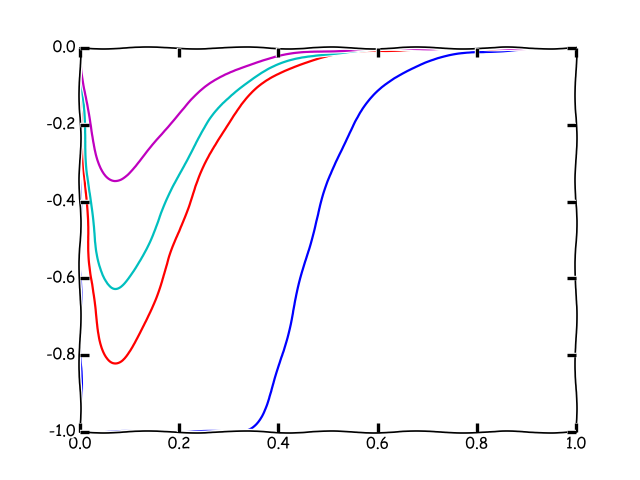

In [8]:
%matplotlib notebook
# double exponential
import numpy as np
from scipy.special import erf

def clip(x,k):
    s=1
    return erf(x)


t=np.arange(0,10000)

x=t/10000
u=3.
v=4.
s=4
su=s*u
sv=s*v
y=(np.exp(-sv*x)-np.exp(-su*x))*1.5

lim = -0.4

plt.plot(x,clip(y*100,k))

plt.plot(x,clip(y*6,k))
plt.plot(x,clip(y*4,k))

plt.plot(x,clip(y*2,k))


plt.show()

<IPython.core.display.Javascript object>


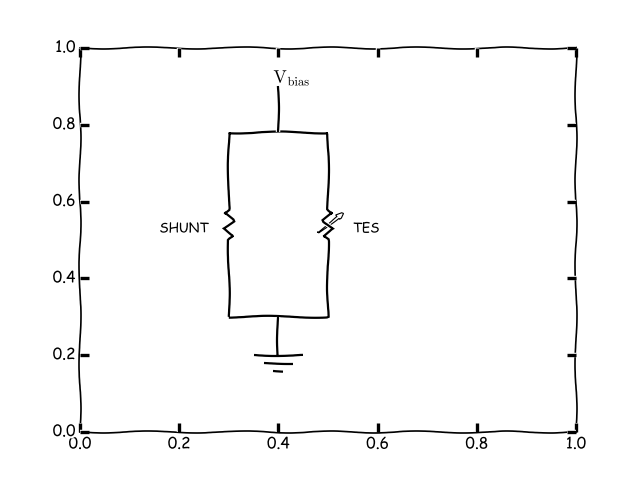

In [9]:
%matplotlib notebook
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

res_verts = [(.3,.3),
             (.3,.5),
             (.31,.51),
             (.3,.52),
             (.29,.53),
             (.3,.54),
             (.31,.55),
             (.3,.56),
             (.29,.57),
             (.3,.58),
             (.3,.78), 
             (.5,.78),
             (.5,.58),
             (.51,.57),
             (.5,.56),
             (.49,.55),
             (.5,.54),
             (.51,.53),
             (.5,.52),
             (.49,.51),
             (.5,.5),
             (.5,.3),
             (.3,.3)
    ]

res_codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO
    ]

res_path = Path(res_verts, res_codes)

vb_verts = [
    (0.4,0.78),
    (0.4,0.9)
]

vb_codes = [
        Path.MOVETO,
        Path.LINETO
    ]
vb_path = Path(vb_verts,vb_codes)

e_verts = [
    (0.4,0.3),
    (0.4,0.2),
    (0.35,0.2),
    (0.45,0.2),
    (0.37,0.18),
    (0.43,0.18),
    (0.39,0.16),
    (0.41,0.16)
]

e_codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO,
    Path.MOVETO,
    Path.LINETO
]

e_path = Path(e_verts, e_codes)
fig = plt.figure()

ax=fig.add_subplot(1,1,1)
ax.add_patch(patches.Arrow(0.48,0.52,.05,.05,width=.02,facecolor='none'))
plt.text(0.55,0.52,'TES',fontsize=12)
plt.text(0.16,0.52,'SHUNT',fontsize=12)
plt.text(0.39,0.91,'$\mathrm{V}_\mathrm{bias}$',fontsize=16)


res_patch = patches.PathPatch(res_path, facecolor='none',edgecolor='black', lw=2)
vb_patch = patches.PathPatch(vb_path,facecolor='none',lw=2)
e_patch = patches.PathPatch(e_path,facecolor='none',lw=2)
ax.add_patch(res_patch)
ax.add_patch(vb_patch)
ax.add_patch(e_patch)

plt.show()

<IPython.core.display.Javascript object>


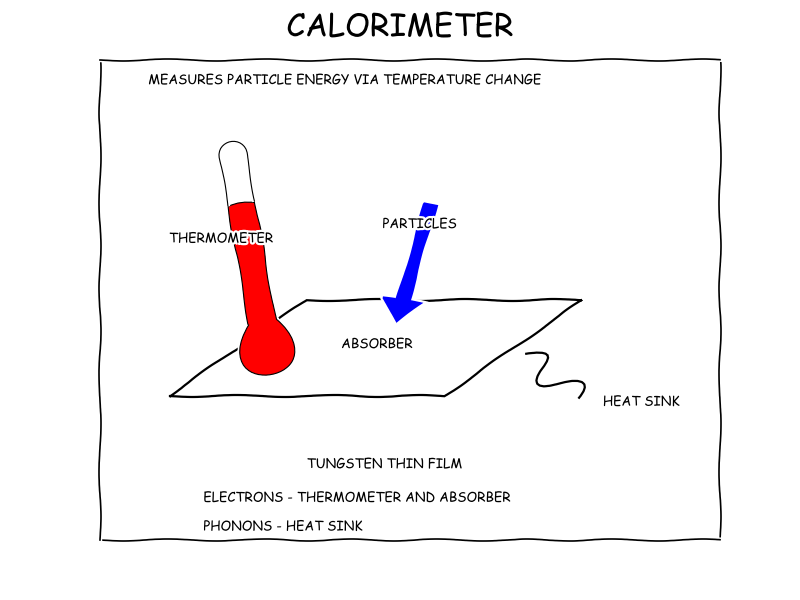

In [12]:
tbase_verts = [
    (0.28,0.25),
    (0.2,0.1),
    (0.4,0.1),
    (0.32,0.25),
    (0.32,0.5),
    (0.3,0.51),
    (0.28,0.5),
    (0.28,0.25)
]

ttop_verts = [
    (0.28,0.5),
    (0.28,0.6),
    (0.28,0.64),
    (0.32,0.64),
    (0.32,0.6),
    (0.32,0.5)
]

p_verts = [
    (0.1, 0.2),
    (0.5, 0.2),
    (0.7, 0.4),
    (0.3, 0.4),
    (0.1, 0.2)
]

w_verts = [
    (0.5, 0.2),
    (0.55, 0.22),
    (0.5, 0.24),
    (0.45, 0.26),
    (0.5, 0.28),
    (0.55,0.30),
    (0.5,0.32)
]

w_codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3

]

tbase_codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.LINETO,
    Path.CURVE3,
    Path.CURVE3,
    Path.LINETO
]

ttop_codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.LINETO
]

p_codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO
]

fig = plt.figure()

tbase_path = Path(tbase_verts, tbase_codes)
tbase_patch = patches.PathPatch(tbase_path, facecolor='red',edgecolor='black', lw=1)
ttop_path = Path(ttop_verts, ttop_codes)
ttop_patch = patches.PathPatch(ttop_path, facecolor='none',edgecolor='black', lw=1)
p_path = Path(p_verts, p_codes)
p_patch = patches.PathPatch(p_path, facecolor='none',edgecolor='black', lw=2)

ax=fig.add_subplot(1,1,1)
plt.yticks([])
plt.xticks([])
t_start = ax.transData
t = matplotlib.transforms.Affine2D().rotate_deg(10)
t_end = t_start + t

t_a = ax.transData
t_w = matplotlib.transforms.Affine2D().rotate_deg(40)
t_t = matplotlib.transforms.Affine2D().translate(0.44,-0.28)

w_path = Path(w_verts, w_codes)
w_patch = patches.PathPatch(w_path, facecolor='none',edgecolor='black', lw=2)
w_patch.set_transform(t_w + t_t + t_a)

tbase_patch.set_transform(t_end)
ttop_patch.set_transform(t_end)

ax.add_patch(w_patch)
ax.add_patch(p_patch)
ax.add_patch(patches.Arrow(0.48,0.6,-0.05,-0.25,width=.1,facecolor='blue',edgecolor='none'))

ax.add_patch(tbase_patch)
ax.add_patch(ttop_patch)

plt.text(0.35,0.3,'ABSORBER',fontsize=12)
plt.text(0.1,0.52,'THERMOMETER',fontsize=12)
plt.text(0.41,0.55,'PARTICLES',fontsize=12)
plt.text(0.73,0.18,'HEAT SINK',fontsize=12)
plt.text(0.07,0.85,'MEASURES PARTICLE ENERGY VIA TEMPERATURE CHANGE',fontsize=12)

plt.text(0.3,0.05,'TUNGSTEN THIN FILM',fontsize=12)
plt.text(0.15,-0.02,'ELECTRONS - THERMOMETER AND ABSORBER',fontsize=12)
plt.text(0.15,-0.08,'PHONONS - HEAT SINK',fontsize=12)

fig.suptitle('CALORIMETER',fontsize=28)
ax.set_ylim(-0.1,0.9)
ax.set_xlim(0,0.9)

fig.savefig('calorimeter.png')
plt.show()


<IPython.core.display.Javascript object>


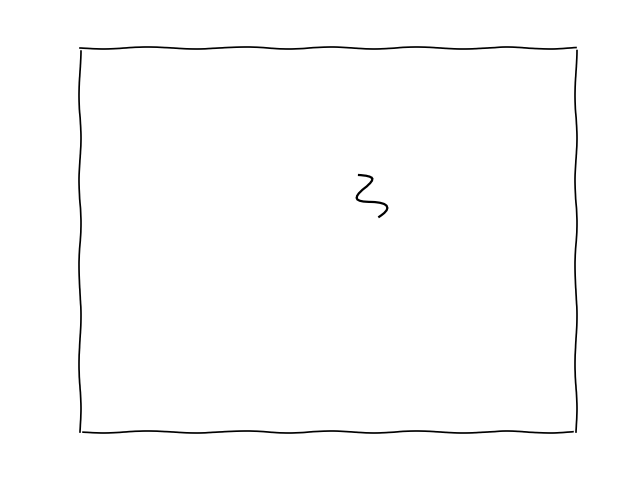

In [47]:
w_verts = [
    (0.5, 0.2),
    (0.55, 0.22),
    (0.5, 0.24),
    (0.45, 0.26),
    (0.5, 0.28),
    (0.55,0.30),
    (0.5,0.32)
]

w_codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3,
    Path.CURVE3

]

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
plt.yticks([])
plt.xticks([])

t_a = ax.transData
t_w = matplotlib.transforms.Affine2D().rotate_deg(20)
t_t = matplotlib.transforms.Affine2D().translate(.2,.2)

w_path = Path(w_verts, w_codes)
w_patch = patches.PathPatch(w_path, facecolor='none',edgecolor='black', lw=2)
w_patch.set_transform(t_w + t_t + t_a)

ax.add_patch(w_patch)

plt.show()
